In [1]:
import matplotlib.pyplot as plt
import numpy as np

from kalman_filter import KalmanFilter

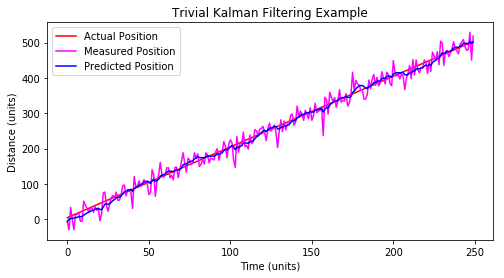

In [2]:
kf = KalmanFilter(initialise_to_trivial_case = True)

# Initialise the initial state x_0, P_0 and add some noise
position_std_dev = 20
velocity_std_dev = 5
true_initial_position = 5
true_constant_velocity = 2

initial_position = true_initial_position + np.random.normal(0, position_std_dev, 1)
initial_velocity = true_constant_velocity + np.random.normal(0, velocity_std_dev, 1)

true_positions = [true_initial_position]
measured_positions = [initial_position[0]]
predicted_positions = [initial_position[0]]

for i in range(1, 250):
    # Take a measurement
    true_positions.append(true_positions[-1] + true_constant_velocity)
    measured_positions.append(true_positions[-1] + np.random.normal(0, position_std_dev, 1)[0])
    z_k = np.matrix([measured_positions[-1]])
    u_k = np.matrix([[0]])
    
    # Update the kalman filter
    predicted_positions.append(kf.update(u_k, z_k)[0,0])
    
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot([i for i in range(len(true_positions))], true_positions, color='red',
       label="Actual Position")
ax.plot([i for i in range(len(measured_positions))], measured_positions, color='magenta',
       label="Measured Position")
ax.plot([i for i in range(len(predicted_positions))], predicted_positions, color='blue',
       label="Predicted Position")
plt.legend()
ax.set_title("Trivial Kalman Filtering Example")
ax.set_xlabel("Time (units)")
ax.set_ylabel("Distance (units)")
plt.show()